In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14, 8)
plt.rcParams.update({'font.size': 18})
develop = False
rng = np.random.default_rng()

In [3]:
# 1. Sett opp dynamikk for bilen
dt = 1
# p_t = P_t-1 + dt * v_t-1
# v_t = v_t-1
M = np.array([[1, dt],
            [0, 1]])

In [7]:
# 2. les inn posisjonsdata
pos_obs = np.loadtxt("observed_car_position.csv", delimiter=",")
pos_truth = np.loadtxt("true_car_position.csv", delimiter=",")
T = pos_obs.size

array([ 53.87708443,  52.15695146,  50.4814677 ,  52.67776271,
        58.06291053,  50.5869304 ,  55.30193181,  78.32144355,
        64.0415279 ,  64.09584071,  76.75043044,  78.01559183,
        76.884978  ,  77.75325139,  70.88816132,  88.6132585 ,
        87.88113277,  75.59418238,  77.42233817,  94.35491233,
        90.21727702,  94.62356233,  96.08288615,  93.3729407 ,
        99.06578437, 103.51777153, 102.74085638, 108.40663183,
       102.35001665, 104.00317181])

In [37]:
# 3. Set opp prior for state ved tid 0 og uvisse i sensormåling
mu = np.array([[3],
               [4]])
Sigma = np.array([[50,0],
                 [0,50]])
Sigma_y = np.array([50])

In [38]:
# 4. Skriv ein predict() funksjon: Må ta inn M, Sigma, og mu
def predict(M, Sigma, mu):
    mu_t = M @ mu
    Sigma_t = M @ Sigma @ M.T
    return mu_t, Sigma_t

In [39]:
# 5. Skriv ein update() funksjon!
def update(y, H, Sigma, mu , Sigma_y):
    K = Sigma @ H.T @ np.linalg.inv(H@Sigma@H.T + Sigma_y)
    y_pred = H @ mu
    mu_posterior = mu + K @ (y - y_pred)
    Sigma_posterior = Sigma - K @ H @ Sigma
    return mu_posterior, Sigma_posterior

In [40]:
# 6. Iterativt kall update og predict for å assimilere data ved ulike tidspunkt
H = np.array([[1, 0]])
mu_pos_prior = []
mu_pos_posterior = []
for t in range(T):
    mu_pos_prior.append(mu[0])
    mu, Sigma = update(pos_obs[t], H, Sigma, mu, Sigma_y)
    mu_pos_posterior.append(mu[0])
    mu, Sigma = predict(M, Sigma, mu)

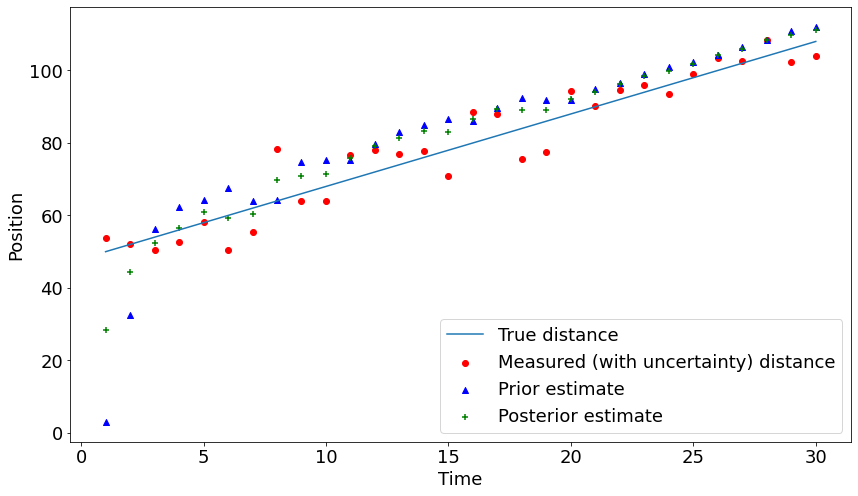

In [41]:
# 7. pretty print
# Inspect
time = np.linspace(1,T,T)
plot1 = plt.figure(1)
plt.plot(time, pos_truth)
plt.scatter(time, pos_obs, color="red")
plt.ylabel('Position')
plt.xlabel('Time')
plt.scatter(time, mu_pos_prior, color="blue", marker="^")
plt.scatter(time, mu_pos_posterior, color="green", marker="+")
plt.legend([
    'True distance', 
    'Measured (with uncertainty) distance', 
    'Prior estimate',
    'Posterior estimate'])
plt.show()